# 1. Read all cleaned csv files

In [135]:
# Read all csv

import pandas as pd 

rfm_data = pd.read_csv('rfm_data.csv')
newcust_data = pd.read_csv('new_customer_cleaned.csv')
custdemo_data = pd.read_csv('customer_demography_cleaned.csv')
custadd_data = pd.read_csv('customer_address_cleaned.csv')


## RFM data

In [136]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3494 entries, 0 to 3493
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  3494 non-null   int64  
 1   recency      3494 non-null   int64  
 2   frequency    3494 non-null   int64  
 3   monetary     3494 non-null   float64
 4   r_score      3494 non-null   int64  
 5   f_score      3494 non-null   int64  
 6   m_score      3494 non-null   int64  
 7   rfm_score    3494 non-null   int64  
 8   Segment      3494 non-null   object 
dtypes: float64(1), int64(7), object(1)
memory usage: 245.8+ KB


## New Customer data

In [137]:
newcust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           983 non-null    object 
 1   last_name                            983 non-null    object 
 2   gender                               983 non-null    object 
 3   past_3_years_bike_related_purchases  983 non-null    int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            983 non-null    object 
 6   job_industry_category                983 non-null    object 
 7   wealth_segment                       983 non-null    object 
 8   deceased_indicator                   983 non-null    object 
 9   owns_car                             983 non-null    object 
 10  tenure                               983 non-null    int64  
 11  address                         

## Customer demographic

In [138]:
custdemo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3913 entries, 0 to 3912
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3913 non-null   int64  
 1   first_name                           3913 non-null   object 
 2   last_name                            3913 non-null   object 
 3   gender                               3913 non-null   object 
 4   past_3_years_bike_related_purchases  3913 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3913 non-null   object 
 7   job_industry_category                3913 non-null   object 
 8   wealth_segment                       3913 non-null   object 
 9   deceased_indicator                   3913 non-null   object 
 10  owns_car                             3913 non-null   object 
 11  tenure                        

## Customer Address

In [139]:
custadd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


# 2. Segmentwise State distribution

- Merge `custadd['state']` column with `rfm_data` df based on 'customer_id'.

In [140]:
custadd_data.head(2)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10


In [141]:
rfm_data.head(2)

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,Segment
0,1,7,11,9084.45,5,5,5,555,Champions
1,2,128,3,4149.07,1,1,2,112,Lost Customers


In [142]:
len(custadd_data)

3999

In [143]:
len(rfm_data)

3494

- Length of custadd_data and rfm_data varies because we dropped some rows in transaction_data during cleaning.
(Check transaction_data_cleaning.ipynb)

In [144]:
rfm_updated = pd.merge(rfm_data, custadd_data[['customer_id','state']], on ='customer_id')

In [145]:
rfm_updated.head(2)

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,Segment,state
0,1,7,11,9084.45,5,5,5,555,Champions,NSW
1,2,128,3,4149.07,1,1,2,112,Lost Customers,NSW


In [146]:
from collections import defaultdict, Counter

grouped_data = rfm_updated.groupby('Segment')
segmentwise_states = defaultdict(str)
for segment, group in grouped_data:
    segmentwise_states[segment] = group['state'].tolist()
for keys, values in segmentwise_states.items():
    segmentwise_states[keys] = Counter(values)

segmentwise_states

defaultdict(str,
            {' At Risk': Counter({'NSW': 98,
                      'QLD': 49,
                      'VIC': 34,
                      'Victoria': 5}),
             'Average Customers': Counter({'NSW': 559,
                      'VIC': 237,
                      'QLD': 227,
                      'Victoria': 20}),
             'Champions': Counter({'NSW': 62,
                      'QLD': 34,
                      'VIC': 28,
                      'Victoria': 4}),
             'Lost Customers': Counter({'NSW': 594,
                      'VIC': 270,
                      'QLD': 246,
                      'Victoria': 37}),
             'Loyal Customers': Counter({'NSW': 116,
                      'VIC': 53,
                      'QLD': 38,
                      'Victoria': 6}),
             'New Customers': Counter({'NSW': 249,
                      'VIC': 103,
                      'QLD': 92,
                      'Victoria': 7}),
             'Potential Loyalists': Counter(

### Plots

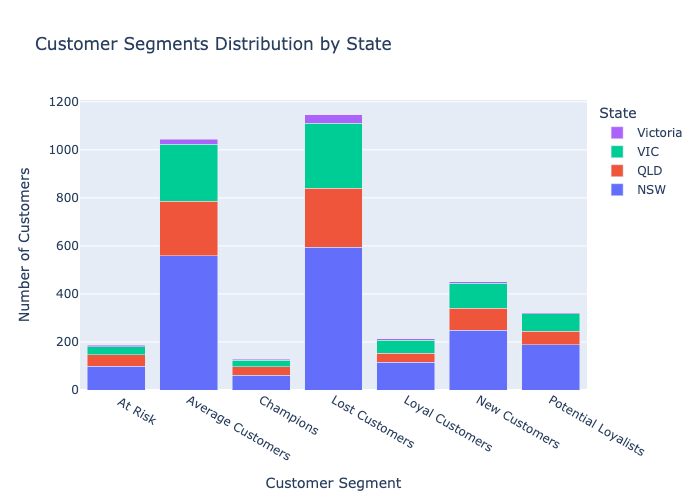

In [147]:
# Extract unique states
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import Image
states = sorted(set(state for counts in segmentwise_states.values() for state in counts))

# Create traces for each state
traces = []
for state in states:
    # Create a bar trace for this state
    traces.append(go.Bar(
        x=list(segmentwise_states.keys()),  # Segments on x-axis
        y=[segmentwise_states[segment].get(state, 0) for segment in segmentwise_states],
        name=state
    ))

# Create Figure
fig = go.Figure(data=traces)

# Update layout
fig.update_layout(
    barmode='stack',
    title='Customer Segments Distribution by State',
    xaxis_title='Customer Segment',
    yaxis_title='Number of Customers',
    legend_title='State'
)

# Show plot
# fig.show()
# Save the figure as a static image
pio.write_image(fig, 'customer_segments_by_states.png')

# Display the image in the notebook

Image('customer_segments_by_states.png')






In [148]:
states

['NSW', 'QLD', 'VIC', 'Victoria']

### Analysis

1. NSW has highest share in all segments because NSW has maximum number of overall customers.
2. Victoria has least share in all segments because Victoria has minimum number of overall customers.

In [149]:
# No of customers from each state
statewise_customers = rfm_updated.groupby('state').agg({'customer_id': 'count'})
statewise_customers.rename(columns={'customer_id':'number_of_customers'}, inplace=True)
statewise_customers

,number_of_customers
state,
NSW,1866
QLD,743
VIC,798
Victoria,82


# 3. State wise customer distribution

- As we see from previous graph, NSW has the largest share of customers.
- Let' analyse statewise distrbution of customer segments, so statewise startegoes can be created.

In [150]:
rfm_data.head()

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,Segment
0,1,7,11,9084.45,5,5,5,555,Champions
1,2,128,3,4149.07,1,1,2,112,Lost Customers
2,3,102,8,9888.23,1,4,5,145,At Risk
3,4,195,2,1047.72,1,1,1,111,Lost Customers
4,5,16,6,5903.20,4,3,3,433,Average Customers


In [151]:
# Group dataframe by state 
statewise_cust_group = rfm_updated.groupby('state')

# Create a dictionary of statewise segments
statewise_segments = defaultdict(str)
for state, group in statewise_cust_group:
    statewise_segments[state] = group['Segment'].tolist()

for keys, values in statewise_segments.items():
    statewise_segments[keys] = Counter(values)

statewise_segments

defaultdict(str,
            {'NSW': Counter({'Lost Customers': 594,
                      'Average Customers': 559,
                      'New Customers': 249,
                      'Potential Loyalists': 188,
                      'Loyal Customers': 116,
                      ' At Risk': 98,
                      'Champions': 62}),
             'QLD': Counter({'Lost Customers': 246,
                      'Average Customers': 227,
                      'New Customers': 92,
                      'Potential Loyalists': 57,
                      ' At Risk': 49,
                      'Loyal Customers': 38,
                      'Champions': 34}),
             'VIC': Counter({'Lost Customers': 270,
                      'Average Customers': 237,
                      'New Customers': 103,
                      'Potential Loyalists': 73,
                      'Loyal Customers': 53,
                      ' At Risk': 34,
                      'Champions': 28}),
             'Victoria': Counte

## Plots

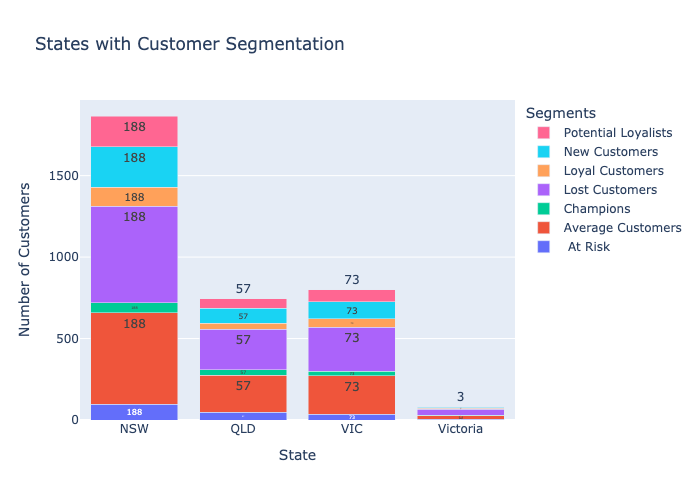

In [152]:
import plotly.graph_objects as go

segments = list(segmentwise_states.keys())  # For consistent stacking

# Color map for segments
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692']

# Create Figure
fig = go.Figure()

# Add bars for each segment 
for segment, color in zip(segments,colors):
    fig.add_trace(go.Bar(
        name = segment,
        x= list(statewise_segments.keys()),
        y =[statewise_segments[state].get(segment,0) for state in statewise_segments.keys()],
        marker = dict(color=color),
        text=counts
    ))

# Layout for bars
fig.update_layout(
    barmode= 'stack',
    title= 'States with Customer Segmentation',
    xaxis = dict(title= 'State'),
    yaxis = dict(title = 'Number of Customers'),
    legend = dict(title = 'Segments')
)

# fig.show()

# Save the figure as a static image
pio.write_image(fig, 'states_with_segmentation.png')

# Display the image in the notebook

Image('states_with_segmentation.png')

## Analysis

1. NSW has highest numbers in every customer segment which indicates a strong customer base and market presence in NSW. Thus continuing the investment in NSW will strengthen companies positions.

2. In NSW Lost customers is highest among all other customer segments. There is a need to identify the problems and get on a feedback loop to retain them. Also, with this it can move Avaerage customers towards Loyal ones.

3. Among all states- a similar trend of high Lost Customers and Average Customers can be seen. It points towads many issues:

(a)  The issue might be with -- Product quality, customer satisfaction, quality to cost ratio, customer service -- out of many. There is a need to identify root cause.

- Revaluate pricings, service quality

(b) Lot of customers may not find any difference between buying from here or somewhere else.

- Create unique programs to attarct and retain them.

(c) Lot of lost customers means urgent upgradation of retention program.

(d) Lot of average customers means a good chance for making Loyal customers/champions.



# 4. Agewise Customer Distribution

- Different age group people have different requirements for a bike based on their age.
- Let's divide the customers into 4 age groups:
1. Young age: 18-35
2. Middle age: 36-50
3. Senior age: 51-65
4. Old age: 66 and above

- We will analyse
1. Age wise customer distribution
2. Age wise money spent by customers





In [153]:
# Merge 'age' of custdemo_data to rfm_with_state data

# rfm_with_state = pd.merge(rfm_data, custadd_data[['customer_id','state']], on ='customer_id')
# custdemo_data['age']
rfm_updated = pd.merge(rfm_updated, custdemo_data[['customer_id','age']], on='customer_id')
rfm_updated.head()

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,Segment,state,age
0,1,7,11,9084.45,5,5,5,555,Champions,NSW,64
1,2,128,3,4149.07,1,1,2,112,Lost Customers,NSW,37
2,4,195,2,1047.72,1,1,1,111,Lost Customers,QLD,56
3,5,16,6,5903.20,4,3,3,433,Average Customers,NSW,40
4,6,64,5,5931.69,2,2,3,223,Lost Customers,VIC,51


## 4.1 Agewise Customer Distribution


### (a) Find customer distribution

In [154]:
# Create age group
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # Age groups
labels = ['Teens(0-18)', 'Young Adults(19-25)', 'Early Career Age(26-35)', 'Established Career Age(36-45)', 'Middle Age(46-55)','Pre-Retirement Age(55-64)', 'Elderly(65+)']

In [155]:
# Categorize 'age' column into bins
rfm_updated['age_group'] = pd.cut(rfm_updated['age'], bins=bins, labels=labels, right=False)

In [156]:
rfm_updated.head()

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,Segment,state,age,age_group
0,1,7,11,9084.45,5,5,5,555,Champions,NSW,64,Pre-Retirement Age(55-64)
1,2,128,3,4149.07,1,1,2,112,Lost Customers,NSW,37,Established Career Age(36-45)
2,4,195,2,1047.72,1,1,1,111,Lost Customers,QLD,56,Pre-Retirement Age(55-64)
3,5,16,6,5903.20,4,3,3,433,Average Customers,NSW,40,Established Career Age(36-45)
4,6,64,5,5931.69,2,2,3,223,Lost Customers,VIC,51,Middle Age(46-55)


In [157]:
# Group customers by age_group and count customers in each group
age_grouped_customers = rfm_updated.groupby('age_group').agg({'customer_id':'count'})

/var/folders/pj/jpdw695151g451wf0zdz5wm40000gp/T/ipykernel_79217/667523226.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [158]:
# Rename column
age_grouped_customers.rename(columns={'customer_id': 'number_of_customers'}, inplace=True)

In [159]:
age_grouped_customers

,number_of_customers
age_group,
Teens(0-18),73
Young Adults(19-25),446
Early Career Age(26-35),594
Established Career Age(36-45),1168
Middle Age(46-55),611
Pre-Retirement Age(55-64),515
Elderly(65+),5


### (b) Plot

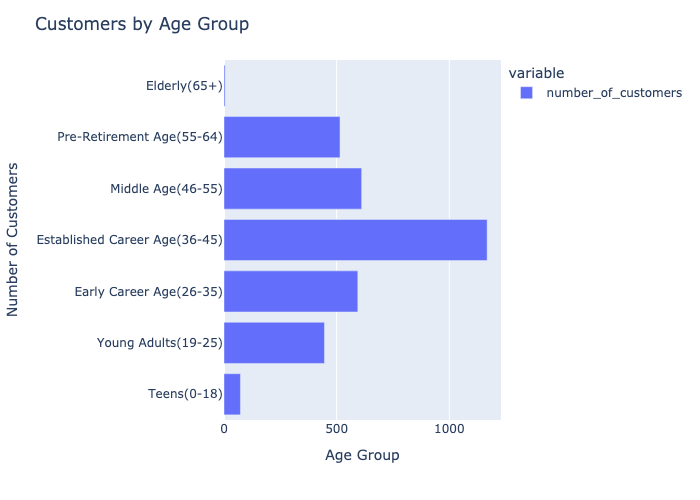

In [170]:
import plotly.express as px

fig = px.bar(age_grouped_customers, orientation='h')
fig.update_layout(
    xaxis_title='Age Group',
    yaxis_title= 'Number of Customers',
    title= 'Customers by Age Group',
)
# fig.show()

# Save the figure as a static image
pio.write_image(fig, 'customers_by_age.png')

# Display the image in the notebook

Image('customers_by_age.png')

### (c) Analysis

1. Teens(0-18):
- They have no licence but there are 73 items sold.
- These may be data entry mistake or incomplete data.
- Or, bikes are purchased by parents' children name?

2. Young Adults(19-25):
- An important customer base because this age group has considerable number of customers.
- They are often more tech-enthusiasts and open to new products or brands. 
- This segment could be valuable for products that appeal to lifestyle of students/uni grads etc.

3. Early career Age(26-35):
- This age group also has considerable number of customers.
- They are new ones to get disposable income.

4. Established career Age(36-45):
- They make the highest customer base.
- They have high income, so spending more.

5. Middle age and pre-retirement age:
- They together make equivalent to Established career age group.

6. Elderly:
- Very small base - natural to avoid bikes for safety purposes.


## 4.2 Sales by age
- Group agewise and sum the money spent by cutomers in each group.

In [162]:
transaction_data = pd.read_csv('transaction_data_cleaned.csv')


In [163]:
rfm_updated = pd.merge(rfm_updated, transaction_data[['customer_id','profit']], on='customer_id')

In [164]:
rfm_updated.head(2)

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,Segment,state,age,age_group,profit
0,1,7,11,9084.45,5,5,5,555,Champions,NSW,64,Pre-Retirement Age(55-64),110.56
1,1,7,11,9084.45,5,5,5,555,Champions,NSW,64,Pre-Retirement Age(55-64),751.02


In [165]:
total_profit = rfm_updated.groupby('age_group').agg({'profit':'sum'})

/var/folders/pj/jpdw695151g451wf0zdz5wm40000gp/T/ipykernel_79217/3271431205.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [166]:
total_profit

,profit
age_group,
Teens(0-18),229477.74
Young Adults(19-25),1415174.07
Early Career Age(26-35),1814447.83
Established Career Age(36-45),3641887.80
Middle Age(46-55),1915766.97
Pre-Retirement Age(55-64),1609273.09
Elderly(65+),17308.68


In [167]:
type(total_profit)

pandas.core.frame.DataFrame

### Plot

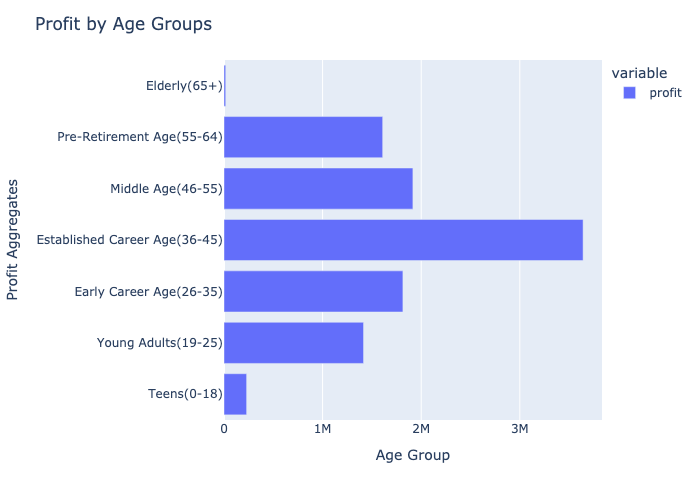

In [171]:
# Plot

fig = px.bar(total_profit, orientation='h')

# Update the layout to include axis labels
fig.update_layout(
    xaxis_title='Age Group',
    yaxis_title='Profit Aggregates',
    title= 'Profit by Age Groups'
)

# fig.show()

# Save the figure as a static image
pio.write_image(fig, 'profits_by_age.png')

# Display the image in the notebook

Image('profits_by_age.png')



# 5. Profit by Industry


In [119]:
# Merge industry from customer demography to rfm updated
rfm_updated = pd.merge(rfm_updated, custdemo_data[['customer_id', 'job_industry_category']], on= 'customer_id')

In [120]:
# Group by industry
grouped_by_industry = rfm_updated.groupby('job_industry_category')

# Industry wise profit
profit_by_industry = grouped_by_industry.agg({'profit': 'sum'})


In [121]:
profit_by_industry.reset_index()

,job_industry_category,profit
0,Argiculture,302991.35
1,Entertainment,386109.45
2,Financial Services,2130202.25
3,Health,1652593.94
4,IT,378981.32
5,Manufacturing,2159586.03
6,Property,700139.25
7,Retail,982011.36
8,Telecommunications,187400.01
9,Unknown category,1768146.81


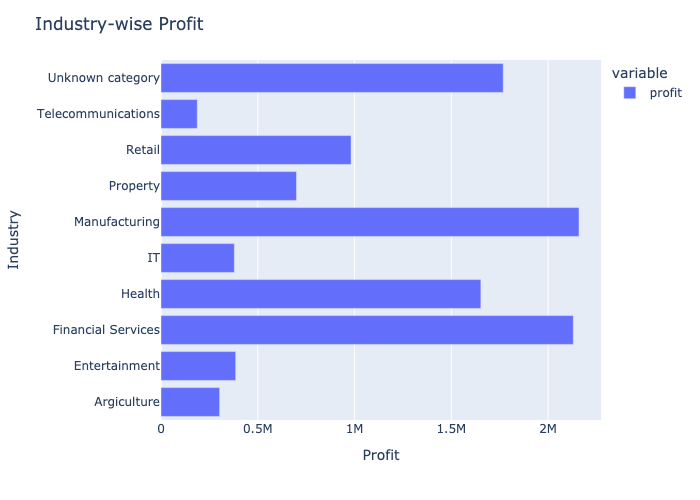

In [172]:
# Plot the profit
data = pd.DataFrame(profit_by_industry)


fig = px.bar(profit_by_industry, orientation='h')
fig.update_layout(
    xaxis_title = 'Profit',
    yaxis_title = 'Industry',
    title = 'Industry-wise Profit'
)
# fig.show()

# Save the figure as a static image
pio.write_image(fig, 'profits_by_industry.png')

# Display the image in the notebook

Image('profits_by_industry.png')

# Profit by Segments

In [123]:
segmentwise_profit = rfm_updated.groupby('Segment').agg({'profit':'sum'})

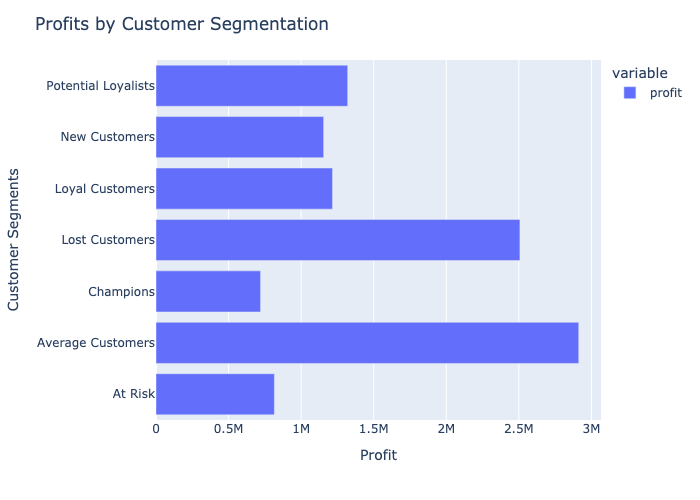

In [174]:
# Plot
fig = px.bar(segmentwise_profit, orientation='h')
fig.update_layout(
    xaxis_title = 'Profit',
    yaxis_title = 'Customer Segments',
    title = 'Profits by Customer Segmentation'
)
# fig.show()

# Save the figure as a static image
pio.write_image(fig, 'profits_by_segments.png')

# Display the image in the notebook

Image('profits_by_segments.png')